# Importacion de librerias

In [1]:
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
import seaborn as sns

# Importacion de dataframes

In [19]:
df = pd.read_csv("../data/df.csv")

In [3]:
dft = pd.read_csv("../data/dft.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Periodo     303 non-null    object 
 1   Euribor_1y  303 non-null    float64
 2   IdPeriodo   303 non-null    int64  
 3   Int_rate    303 non-null    float64
 4   Año         303 non-null    int64  
 5   Mes         303 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 14.3+ KB


Las variables año y mes nos interesa tratarlas como categóricas por lo que las convertimos a string

In [145]:
df['Año'] = df['Año'].astype('str')
df['Mes'] = df['Mes'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Periodo     303 non-null    object 
 1   Euribor_1y  303 non-null    float64
 2   IdPeriodo   303 non-null    int64  
 3   Int_rate    303 non-null    float64
 4   Año         303 non-null    object 
 5   Mes         303 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.3+ KB


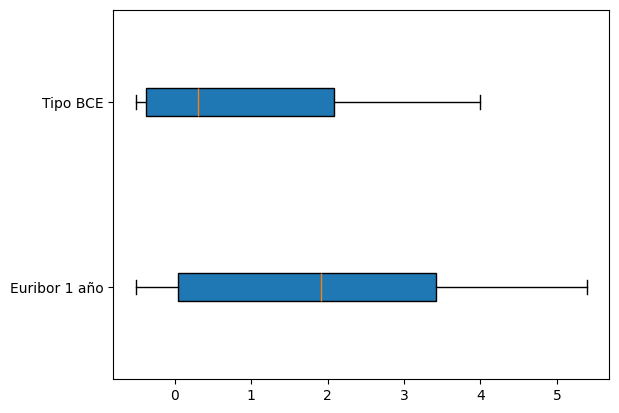

In [5]:
plt.boxplot([df["Euribor_1y"] , df["Int_rate"]], vert=False, labels=["Euribor 1 año", "Tipo BCE"], patch_artist=True)
plt.show()

<Axes: xlabel='Euribor_1y'>

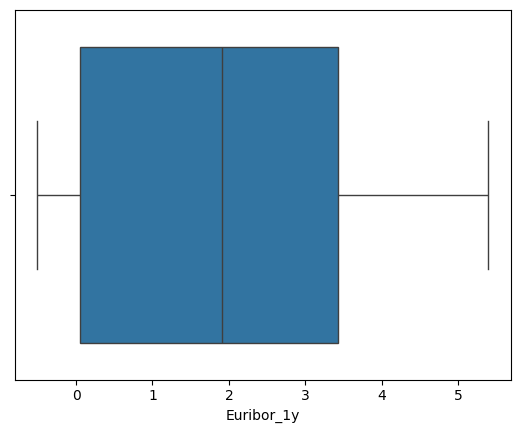

In [6]:
sns.boxplot(data=df, x="Euribor_1y")

<Axes: xlabel='Euribor_1y', ylabel='Mes'>

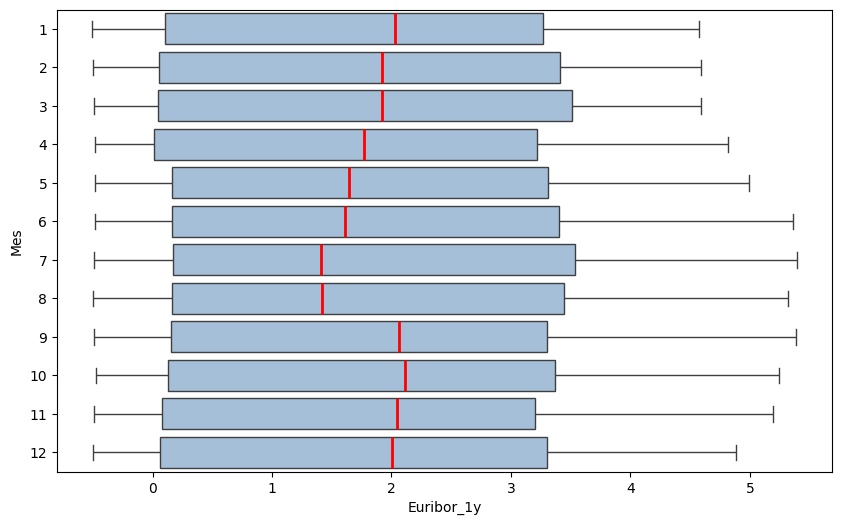

In [8]:
df['Mes'] = df['Mes'].astype('str')
plt.figure(figsize=(10,6))
dftramo = df.loc[(df.Año > 1998)]
sns.boxplot(data=dftramo, x="Euribor_1y", y="Mes", boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2})

In [9]:
df['Mes'] = df['Mes'].astype('int')
dfm = df.groupby("Mes").median("Euribor_1y")

In [10]:
dfm

,Euribor_1y,IdPeriodo,Int_rate,Año
Mes,,,,
1,2.0265,201151.0,0.625000,2011.5
2,1.9245,201152.0,0.625000,2011.5
3,1.9165,201153.0,0.455645,2011.5
4,1.7710,201104.0,0.308333,2011.0
5,1.6440,201105.0,0.250000,2011.0
6,1.6100,201106.0,0.250000,2011.0
7,1.4120,201107.0,0.250000,2011.0
8,1.4210,201108.0,0.250000,2011.0
9,2.0670,201109.0,0.425000,2011.0


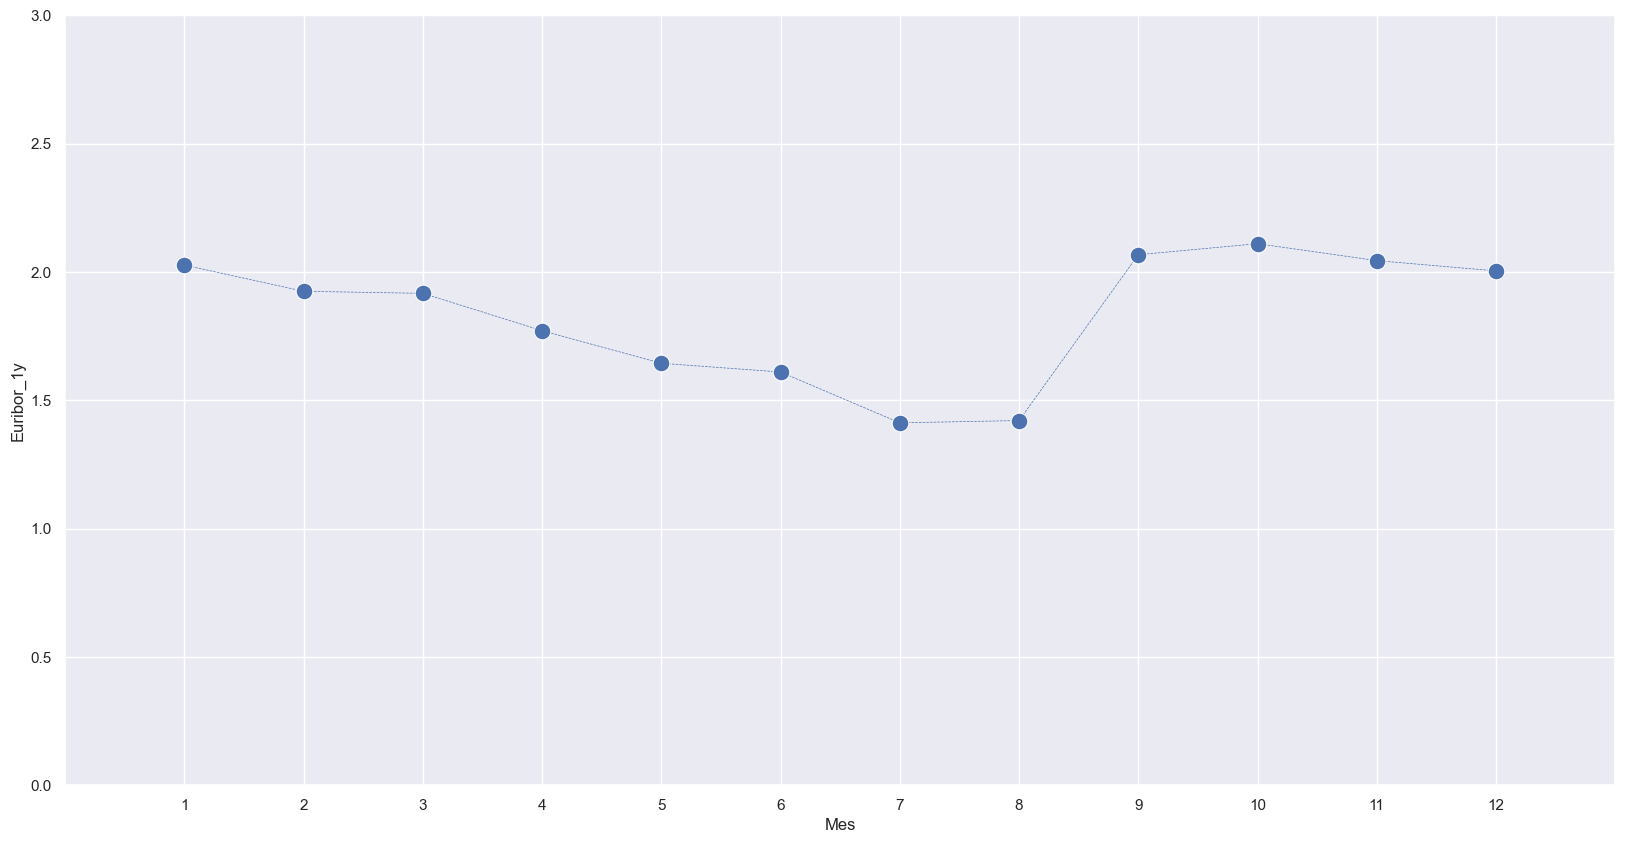

In [12]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(dfm["Euribor_1y"], marker="o", linestyle='dashed',
     linewidth=0.5, markersize=12)

plt.xlabel = ("Mes")
plt.ylabel = ("Mediana del Euribor")
plt.xticks(range(1, 13, 1))
plt.ylim(0,3)
plt.xlim(0,13)
plt.show()

In [13]:
dfp = df.pivot_table(index="Año",
               columns="Mes",
               values="Euribor_1y")
dfp.describe()

Mes,1,2,3,4,5,6,7,8,9,10,11,12
count,26.000000,26.000000,26.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.835577,1.826077,1.847538,1.805600,1.844160,1.875480,1.883960,1.883120,1.899800,1.910720,1.874520,1.831960
std,1.702226,1.706812,1.739406,1.750889,1.807149,1.839082,1.874963,1.880796,1.882271,1.877575,1.815826,1.762202
min,-0.505000,-0.501000,-0.487000,-0.484000,-0.481000,-0.484000,-0.491000,-0.498000,-0.492000,-0.477000,-0.487000,-0.502000
25%,0.106000,0.057750,0.044000,0.013000,0.165000,0.163000,0.167000,0.161000,0.154000,0.128000,0.079000,0.059000
50%,2.026500,1.924500,1.916500,1.771000,1.644000,1.610000,1.412000,1.421000,2.067000,2.110000,2.044000,2.004000
75%,3.268250,3.408000,3.511500,3.221000,3.308000,3.401000,3.539000,3.440000,3.301000,3.369000,3.198000,3.298000
max,4.574000,4.591000,4.590000,4.820000,4.994000,5.361000,5.393000,5.323000,5.384000,5.248000,5.193000,4.881000


<Axes: xlabel='Int_rate', ylabel='Mes'>

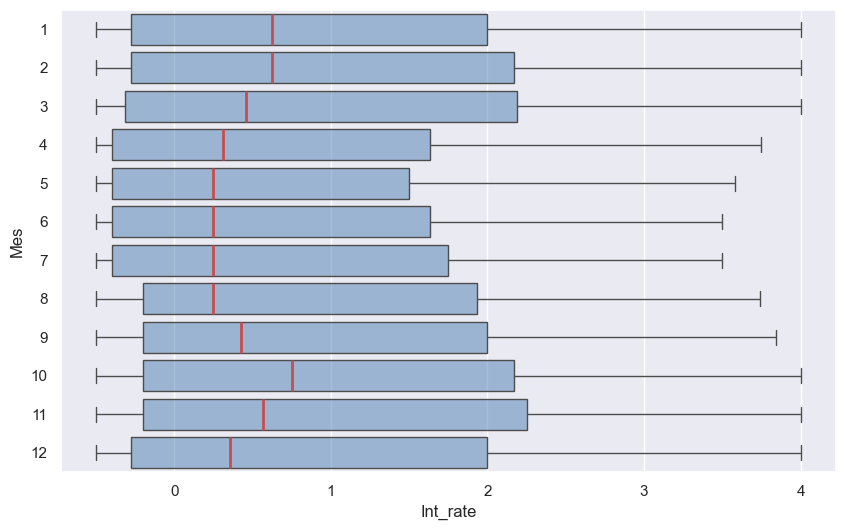

In [20]:
df['Mes'] = df['Mes'].astype('str')
plt.figure(figsize=(10,6))
dftramo = df.loc[(df.Año > 1998)]
sns.boxplot(data=dftramo, x="Int_rate", y="Mes", boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2})

(-1.0, 5.0)

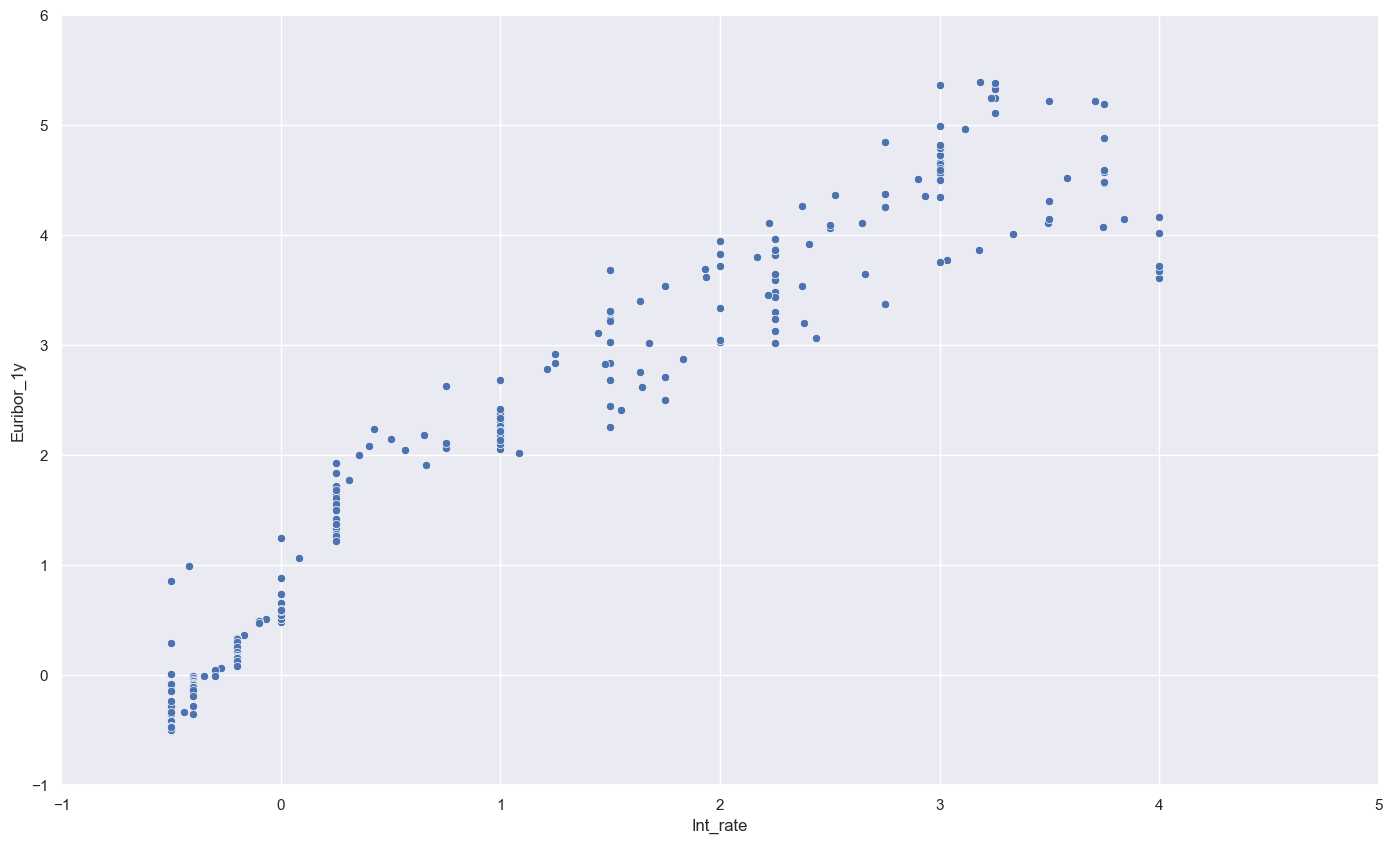

In [21]:
x_col= df["Int_rate"]
y_col= df["Euribor_1y"]
plt.figure(figsize=(17,10))
sns.scatterplot(data=df, x=x_col, y=y_col)
plt.ylim(-1, 6)
plt.xlim(-1, 5)

In [22]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Periodo_x         303 non-null    object 
 1   Euribor_1y        303 non-null    float64
 2   IdPeriodo         303 non-null    int64  
 3   Int_rate          303 non-null    float64
 4   Año               303 non-null    int64  
 5   Mes               303 non-null    int64  
 6   Periodo_y         253 non-null    object 
 7   Número_hipotecas  253 non-null    float64
 8   Importe_(Miles€)  253 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 21.4+ KB


In [93]:
dft.describe()

,Euribor_1y,IdPeriodo,Int_rate,Año,Mes,Número_hipotecas,Importe_(Miles€)
count,303.000000,303.000000,303.000000,303.000000,303.000000,253.000000,2.530000e+02
mean,1.859644,201119.326733,0.949549,2011.128713,6.455446,48628.466403,6.083510e+06
std,1.770711,730.119936,1.380123,7.301905,3.470380,31768.073998,4.340895e+06
min,-0.505000,199901.000000,-0.500000,1999.000000,1.000000,12146.000000,1.175738e+06
25%,0.050500,200504.500000,-0.375806,2005.000000,3.000000,25217.000000,2.830557e+06
50%,1.909000,201108.000000,0.308333,2011.000000,6.000000,33398.000000,4.511779e+06
75%,3.420500,201711.500000,2.084677,2017.000000,9.000000,71794.000000,8.095652e+06
max,5.393000,202403.000000,4.000000,2024.000000,12.000000,129128.000000,1.847348e+07


In [23]:
dft.loc[(dft["IdPeriodo"] > 200212) & (dft["IdPeriodo"] < 202402)]

,Periodo_x,Euribor_1y,IdPeriodo,Int_rate,Año,Mes,Periodo_y,Número_hipotecas,Importe_(Miles€)
48,ENE 2003,2.705,200301,1.750000,2003,1,2003M01,89642.0,7937543.0
49,FEB 2003,2.504,200302,1.750000,2003,2,2003M02,88381.0,8223451.0
50,MAR 2003,2.411,200303,1.548387,2003,3,2003M03,85577.0,8014597.0
51,ABR 2003,2.447,200304,1.500000,2003,4,2003M04,77475.0,7052532.0
52,MAY 2003,2.252,200305,1.500000,2003,5,2003M05,86628.0,8242910.0
...,...,...,...,...,...,...,...,...,...
296,SEP 2023,4.149,202309,3.841667,2023,9,2023M09,31054.0,4446502.0
297,OCT 2023,4.160,202310,4.000000,2023,10,2023M10,31921.0,4486943.0
298,NOV 2023,4.022,202311,4.000000,2023,11,2023M11,32645.0,4762706.0
299,DIC 2023,3.679,202312,4.000000,2023,12,2023M12,24927.0,3501034.0


<Axes: xlabel='Número_hipotecas', ylabel='Euribor_1y'>

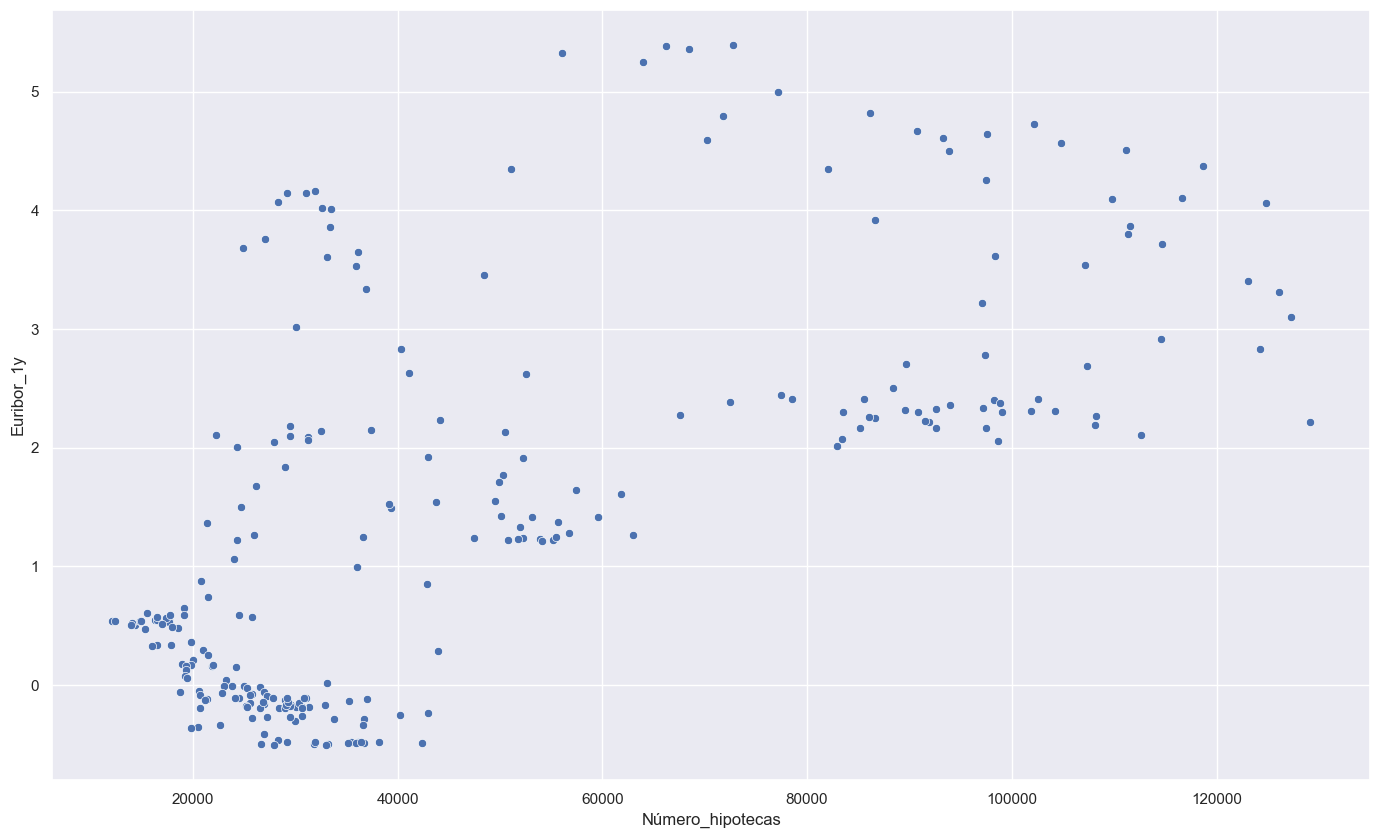

In [24]:
x_col= dft["Número_hipotecas"]
y_col= dft["Euribor_1y"]
plt.figure(figsize=(17,10))
sns.scatterplot(data=dft, x=x_col, y=y_col)

<Axes: xlabel='Importe_(Miles€)', ylabel='Euribor_1y'>

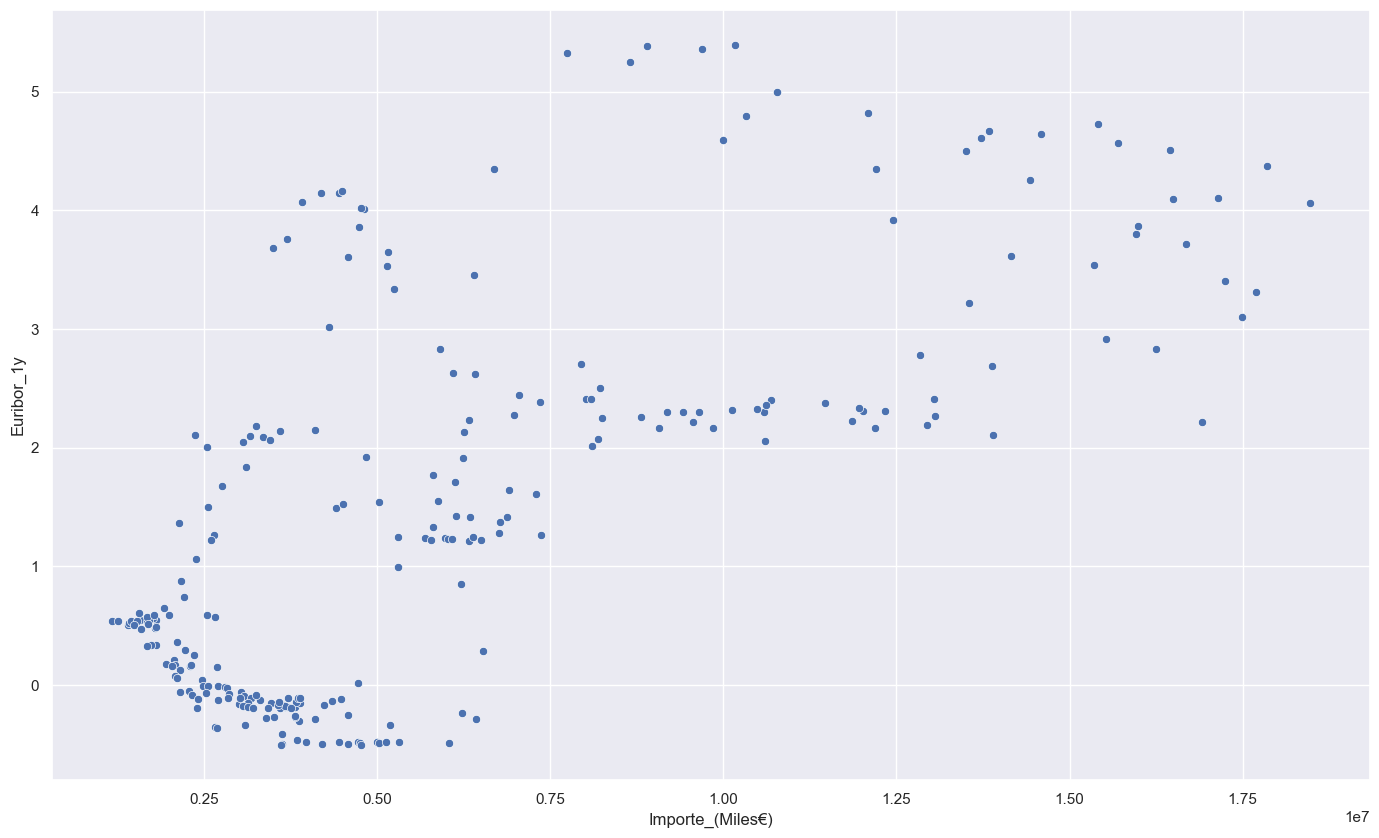

In [25]:
x_col= dft["Importe_(Miles€)"]
y_col= dft["Euribor_1y"]
plt.figure(figsize=(17,10))
sns.scatterplot(data=dft, x=x_col, y=y_col)

<Axes: xlabel='Importe_(Miles€)', ylabel='Número_hipotecas'>

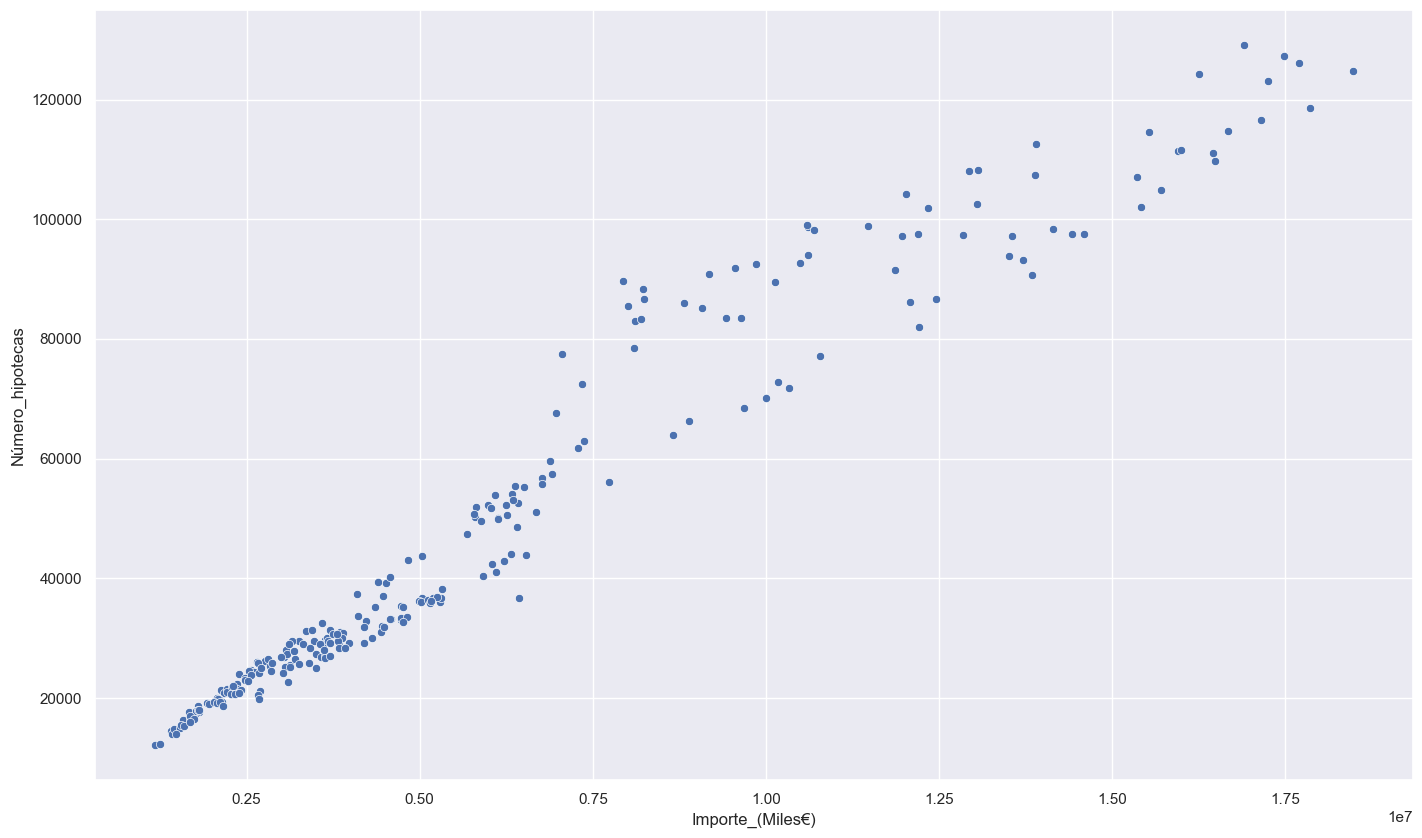

In [26]:
x_col= dft["Importe_(Miles€)"]
y_col= dft["Número_hipotecas"]
plt.figure(figsize=(17,10))
sns.scatterplot(data=dft, x=x_col, y=y_col)

In [27]:
dft["Importe_Medio"] = dft["Importe_(Miles€)"] / dft["Número_hipotecas"]

<Axes: ylabel='Importe_Medio'>

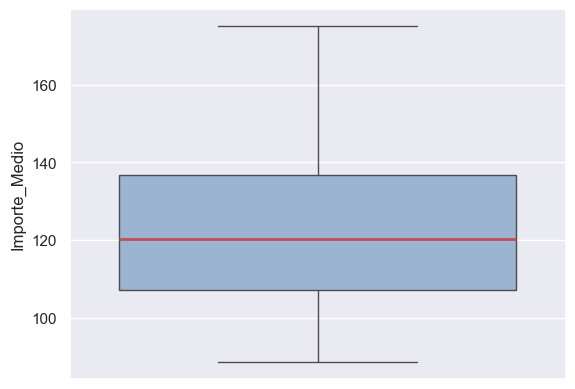

In [28]:
sns.boxplot(dft["Importe_Medio"], boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2})

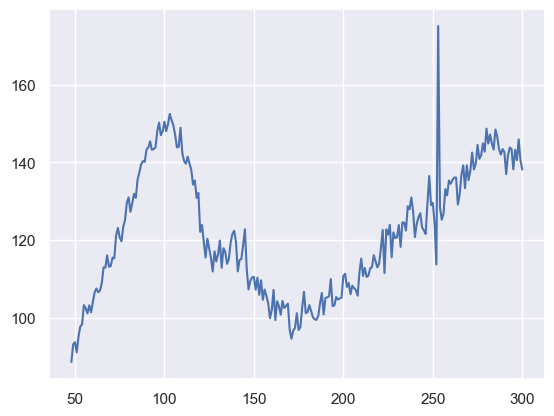

In [29]:
plt.plot(dft["Importe_Medio"])

In [46]:
max_im = dft["Importe_Medio"].max()
max_im_linea = dft.loc[dft["Importe_Medio"] == max_im]#.to_list()[0]
max_im_linea

,Periodo_x,Euribor_1y,IdPeriodo,Int_rate,Año,Mes,Periodo_y,Número_hipotecas,Importe_(Miles€),Importe_Medio
103,AGO 2007,4.666,200708,3.0,2007,8,2007M08,90763.0,13839721.0,152.48197


In [31]:
dft.loc[(dft["IdPeriodo"] > 201910) & (dft["IdPeriodo"] < 202006)]

,Periodo_x,Euribor_1y,IdPeriodo,Int_rate,Año,Mes,Periodo_y,Número_hipotecas,Importe_(Miles€),Importe_Medio
250,NOV 2019,-0.272,201911,-0.5,2019,11,2019M11,29464.0,3817512.0,129.565300
251,DIC 2019,-0.261,201912,-0.5,2019,12,2019M12,30661.0,3810546.0,124.279900
252,ENE 2020,-0.253,202001,-0.5,2020,1,2020M01,40217.0,4572089.0,113.685481
253,FEB 2020,-0.288,202002,-0.5,2020,2,2020M02,36702.0,6427050.0,175.114435
254,MAR 2020,-0.266,202003,-0.5,2020,3,2020M03,27300.0,3506141.0,128.430073
255,ABR 2020,-0.108,202004,-0.5,2020,4,2020M04,24155.0,3023879.0,125.186462
256,MAY 2020,-0.081,202005,-0.5,2020,5,2020M05,25630.0,3249459.0,126.783418


In [32]:
incremento = round((dft.iloc[254]["Importe_(Miles€)"] - dft.iloc[251]["Importe_(Miles€)"]) / 3, 0)
dft.at[252, "Importe_(Miles€)"] = dft.iloc[251]["Importe_(Miles€)"] + incremento
dft.at[253, "Importe_(Miles€)"] = dft.iloc[252]["Importe_(Miles€)"] + incremento
dft.loc[(dft["IdPeriodo"] > 201910) & (dft["IdPeriodo"] < 202006)]

,Periodo_x,Euribor_1y,IdPeriodo,Int_rate,Año,Mes,Periodo_y,Número_hipotecas,Importe_(Miles€),Importe_Medio
250,NOV 2019,-0.272,201911,-0.5,2019,11,2019M11,29464.0,3817512.0,129.565300
251,DIC 2019,-0.261,201912,-0.5,2019,12,2019M12,30661.0,3810546.0,124.279900
252,ENE 2020,-0.253,202001,-0.5,2020,1,2020M01,40217.0,3709078.0,113.685481
253,FEB 2020,-0.288,202002,-0.5,2020,2,2020M02,36702.0,3607610.0,175.114435
254,MAR 2020,-0.266,202003,-0.5,2020,3,2020M03,27300.0,3506141.0,128.430073
255,ABR 2020,-0.108,202004,-0.5,2020,4,2020M04,24155.0,3023879.0,125.186462
256,MAY 2020,-0.081,202005,-0.5,2020,5,2020M05,25630.0,3249459.0,126.783418


In [33]:
incremento = round((dft.iloc[254]["Número_hipotecas"] - dft.iloc[251]["Número_hipotecas"]) / 3, 0)
dft.at[252, "Número_hipotecas"] = dft.iloc[251]["Número_hipotecas"] + incremento
dft.at[253, "Número_hipotecas"] = dft.iloc[252]["Número_hipotecas"] + incremento
dft.loc[(dft["IdPeriodo"] > 201910) & (dft["IdPeriodo"] < 202006)]

,Periodo_x,Euribor_1y,IdPeriodo,Int_rate,Año,Mes,Periodo_y,Número_hipotecas,Importe_(Miles€),Importe_Medio
250,NOV 2019,-0.272,201911,-0.5,2019,11,2019M11,29464.0,3817512.0,129.565300
251,DIC 2019,-0.261,201912,-0.5,2019,12,2019M12,30661.0,3810546.0,124.279900
252,ENE 2020,-0.253,202001,-0.5,2020,1,2020M01,29541.0,3709078.0,113.685481
253,FEB 2020,-0.288,202002,-0.5,2020,2,2020M02,28421.0,3607610.0,175.114435
254,MAR 2020,-0.266,202003,-0.5,2020,3,2020M03,27300.0,3506141.0,128.430073
255,ABR 2020,-0.108,202004,-0.5,2020,4,2020M04,24155.0,3023879.0,125.186462
256,MAY 2020,-0.081,202005,-0.5,2020,5,2020M05,25630.0,3249459.0,126.783418


In [34]:
dft["Importe_Medio"] = dft["Importe_(Miles€)"] / dft["Número_hipotecas"]

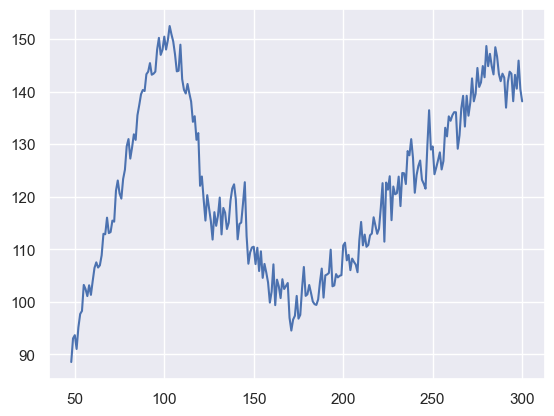

In [35]:
plt.plot(dft["Importe_Medio"])

In [107]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Periodo_x         303 non-null    object 
 1   Euribor_1y        303 non-null    float64
 2   IdPeriodo         303 non-null    int64  
 3   Int_rate          303 non-null    float64
 4   Año               303 non-null    int64  
 5   Mes               303 non-null    int64  
 6   Periodo_y         253 non-null    object 
 7   Número_hipotecas  253 non-null    float64
 8   Importe_(Miles€)  253 non-null    float64
 9   Importe_Medio     253 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 23.8+ KB


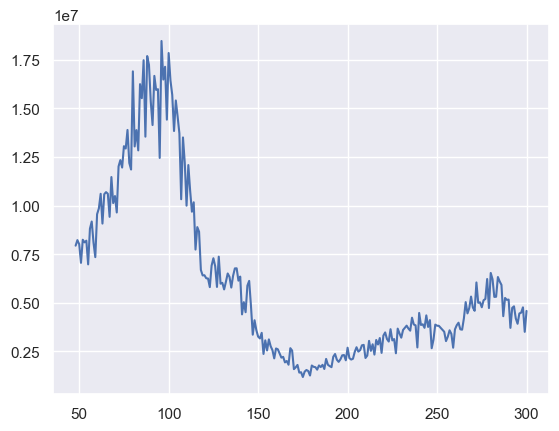

In [36]:
plt.plot(dft["Importe_(Miles€)"])

(0.0, 150000.0)

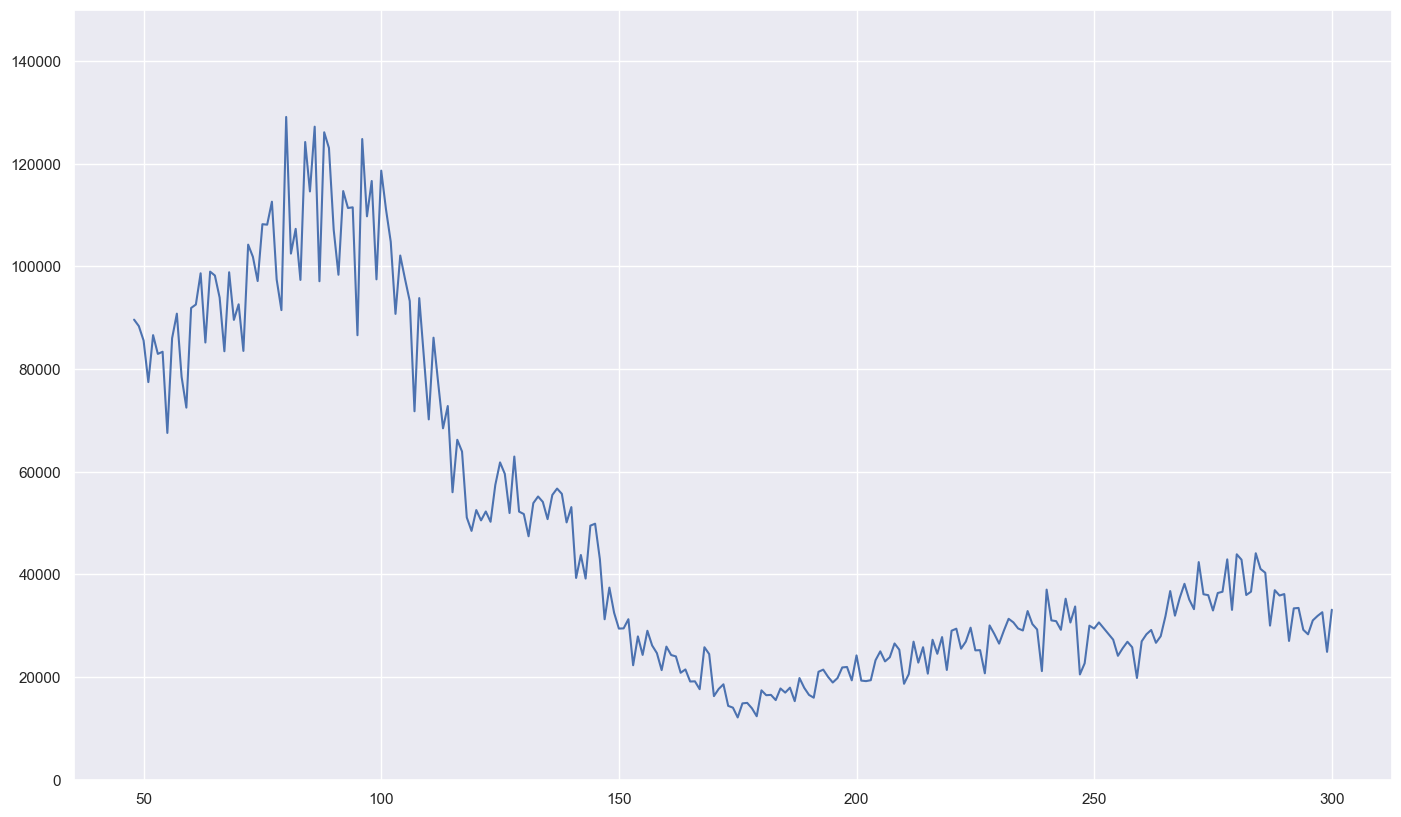

In [37]:
plt.figure(figsize=(17,10))
plt.plot(dft["Número_hipotecas"])
plt.ylim(0,150000)

In [38]:
df_5 = dft.groupby("Mes").sum("Número_hipotecas")

<Axes: ylabel='Número_hipotecas'>

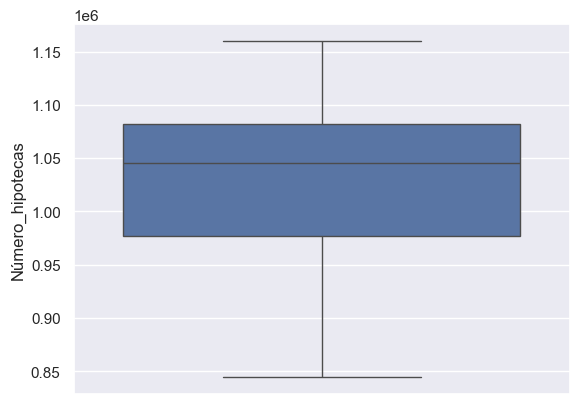

In [39]:
sns.boxplot(df_5["Número_hipotecas"])


<Axes: xlabel='Mes', ylabel='Número_hipotecas'>

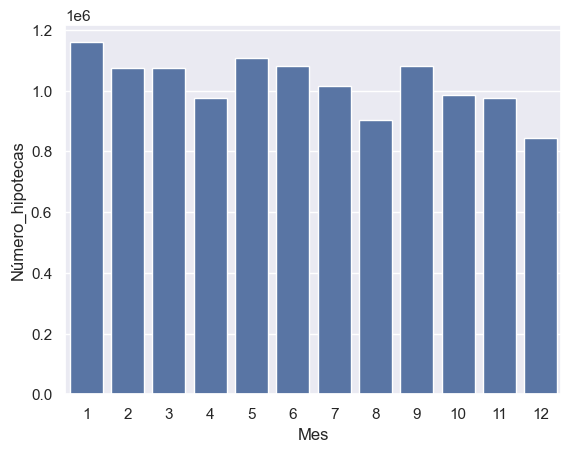

In [40]:
sns.barplot(x=df_5.index, y=df_5["Número_hipotecas"])

In [41]:
# Funcion para calcular el toal de capital amortizado, interes pagados y cuotas pagadas en un año

def tabla_amortizacion_año(capital, tasa, plazo):
    if plazo - 12 >= 0:
        plazo_p = 12
    else:
        plazo_p = plazo

    cuota = round(npf.pmt(tasa/100, plazo, -capital, 0), 2)
    datos = []
    saldo = capital

    for i in range(1, plazo_p+1):
        pago_capital = npf.ppmt(tasa/100, i, plazo, -capital, 0)
        pago_int = cuota - pago_capital
        saldo -= pago_capital  
        linea = [i, round(cuota,2), tasa, round(pago_capital, 2), round(pago_int, 2), round(saldo, 2)]
        datos.append(linea)
    
    df = pd.DataFrame(data=datos, columns=["Mes", "Cuota", "Tipo", "Capital", "Intereses", "Saldo"])
    cap = df["Capital"].sum()
    int = df["Intereses"].sum()
    return [cap, int, cuota*12, plazo_p]

In [42]:
# Calculo del coste en intereses de las hipotecas que se hubieran firmado en cada mes de 1999.

capital_inicial = 120000
plazo_inicial = 300
prima = 1
datos_coste = []
for valor in dft["Mes"].value_counts().index.to_list():
    df_tasas_mes = dft.loc[dft["Mes"] == valor, ["Año", "Euribor_1y"]]
    df_tasas_mes = df_tasas_mes.loc[dft["Año"] < 2024]
    saldo = 0
    intereses = 0
    capital = capital_inicial
    plazo = plazo_inicial
    cuota_t = 0

    for i in df_tasas_mes["Euribor_1y"]:
        valores_año = tabla_amortizacion_año(capital, (i+prima)/12, plazo)
        capital = capital - valores_año[0]
        intereses = intereses + valores_año[1]
        cuota_t = cuota_t + valores_año[2]
        plazo = plazo - valores_año[3]

    fila = [valor, round(intereses, 2), round(cuota_t,2)]
    datos_coste.append(fila)
    
    df_coste = pd.DataFrame(data=datos_coste, columns=["Mes", "Total_Intereses", "Total_Cuota"])

df_coste  
    
    
    

,Mes,Total_Intereses,Total_Cuota
0,1,58907.15,178907.16
1,2,58445.16,178445.16
2,3,58827.13,178827.12
3,4,59164.69,179164.68
4,5,59952.13,179952.12
5,6,60187.08,180187.08
6,7,60451.82,180451.80
7,8,60519.71,180519.72
8,9,59989.57,179989.56
9,10,59964.72,179964.72


In [43]:
df_coste.describe()

,Mes,Total_Intereses,Total_Cuota
count,12.000000,12.000000,12.000000
mean,6.500000,59478.452500,179478.450000
std,3.605551,790.502811,790.499653
min,1.000000,58229.390000,178229.400000
25%,3.750000,58887.145000,178887.150000
50%,6.500000,59558.410000,179558.400000
75%,9.250000,60038.947500,180038.940000
max,12.000000,60519.710000,180519.720000


<Axes: xlabel='None', ylabel='Total_Intereses'>

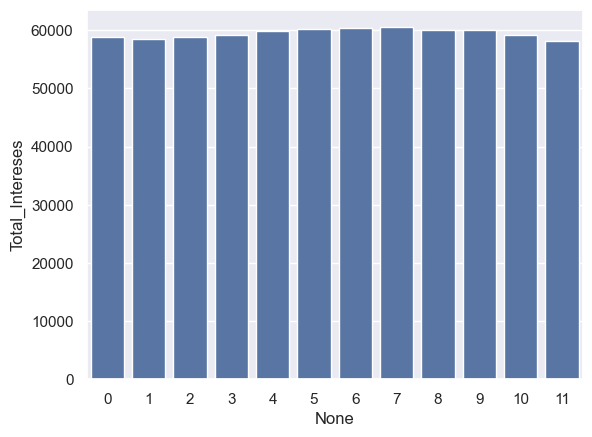

In [44]:
sns.barplot(x=df_coste.index, y=df_coste["Total_Intereses"])

<Axes: xlabel='Total_Intereses'>

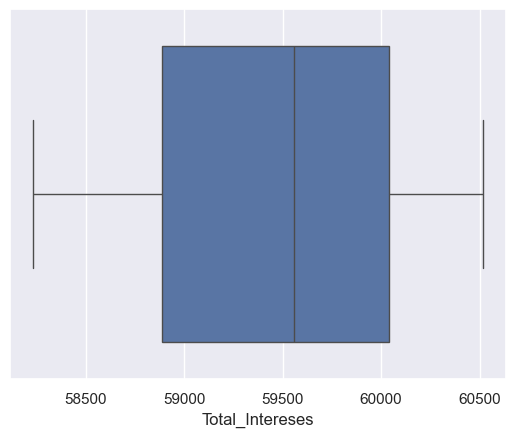

In [45]:
sns.boxplot(data=df_coste, x="Total_Intereses")

